1. Zadanie 1
Zadanie dotyczy odnalezienia warto´sci minimalnej funkcji dw´och zmiennych f oraz zmiennych x i y metoda˛ gradienta wraz z wizualizacja˛ w 3D
odpowiednio do okre´slonego zadania. Mo˙zna skorzysta´c z dowolnych bibliotek Python.

6. f(x, y) = cos((x + 3y)^2), x ∈ [1, 3], y ∈ [1, 3]

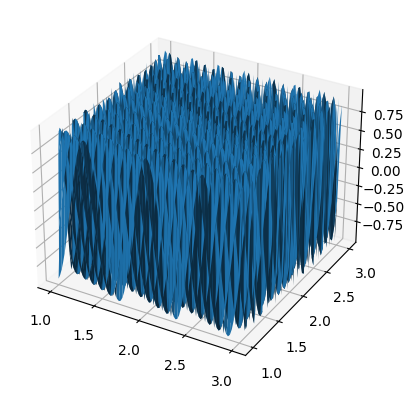

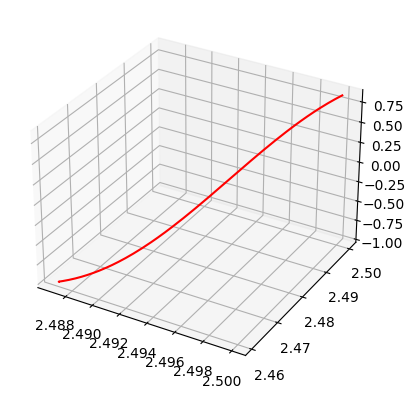

Koncowy punkt [2.48686054 2.46058162]
Minimalna wartosc f -1.0


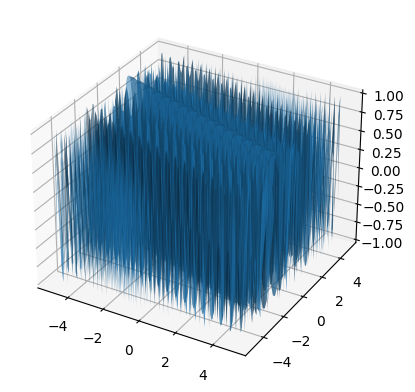

In [62]:
import matplotlib.pyplot as plt
import numpy as np


def f(x: float, y: float) -> float:
    return np.cos((x+3*y)**2)


def grad_f(f, x, y, eps=1e-6):
    grad = np.zeros(2)
    grad[0] = (f(x + eps, y) - f(x - eps, y)) / (2 * eps)
    grad[1] = (f(x, y + eps) - f(x, y - eps)) / (2 * eps)
    return grad


def gradient_descent(f, grad_f, init_point, learning_rate=0.00001, num_iterations=10000):
    point = init_point
    trajectory = [point]
    for i in range(num_iterations):
        grad = grad_f(f,*point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)






fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(1, 3, 100)
y = np.linspace(1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z)
plt.show()

init_point = np.array([2.5,2.5])
trajectory = gradient_descent(f, grad_f, init_point)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], f(
    trajectory[:, 0], trajectory[:, 1]), color='r')
plt.show()

print('Koncowy punkt', trajectory[-1])
print('Minimalna wartosc f', f(*trajectory[-1]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot(trajectory[:, 0], trajectory[:, 1], f(trajectory[:, 0], trajectory[:, 1]), color='r')
plt.show()


2. Zadanie 2
Zadanie dotyczy obliczenia gradient´ow sieci neuronowej z pomoca˛ biblioteki numpy zadanej z pomocy architektury
{"input_dim": 2, "output_dim": 2, "activation": "relu"},
{"input_dim": 2, "output_dim": 1, "activation": "tanh"}

C:\Users\zawma\AppData\Local\Temp\ipykernel_15732\1365823254.py:62: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))
C:\Users\zawma\AppData\Local\Temp\ipykernel_15732\1365823254.py:62: RuntimeWarning: invalid value encountered in log
  cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))
C:\Users\zawma\AppData\Local\Temp\ipykernel_15732\1365823254.py:62: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))


Koszt 0: nan
Koszt 1000: 0.6929131947073798
Koszt 2000: 0.6917890087186186
Koszt 3000: 0.6855313981419762
Koszt 4000: 0.6561160131764037
Koszt 5000: 0.5811774302995119
Koszt 6000: 0.511301021413792
Koszt 7000: 0.460370299459912
Koszt 8000: 0.40683665211912323
Koszt 9000: 0.37424574762636487


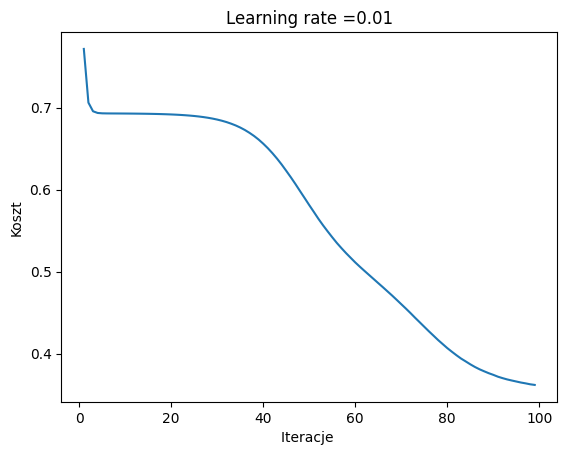

In [63]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self):
        input_size = 2
        hidden_size = 2
        output_size = 1
        # Inicjalizacja wag i biasów dla obu warstw
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_backward(self, dA, Z):
        # Wsteczna propagacja dla funkcji aktywacji ReLU
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
        return dZ

    def tanh(self, Z):
        return np.tanh(Z)

    def tanh_backward(self, dA, Z):
        # Wsteczna propagacja dla funkcji aktywacji tanh
        return dA * (1 - np.power(np.tanh(Z), 2))

    def forward_propagation(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.tanh(self.Z2)
        return self.A2

    def backward_propagation(self, X, Y, A):
        m = X.shape[1]
        dZ2 = A - Y
        # Obliczenie gradientów
        dW2 = np.dot(dZ2, self.A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = self.relu_backward(dA1, self.Z1)
        # Obliczenie gradientów
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m
        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        # Zaktualizowanie wag i biasów
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, Y, num_iterations=10000, learning_rate=0.01):
        costs = []
        for i in range(num_iterations):
            A = self.forward_propagation(X)
            cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))
            dW1, db1, dW2, db2 = self.backward_propagation(X, Y, A)
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)
            if i % 1000 == 0:
                print("Koszt {}: {}".format(i, cost))
            if i % 100 == 0:
                costs.append(cost)
        plt.plot(costs)
        plt.xlabel("Iteracje ")
        plt.ylabel("Koszt")
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
nn = NeuralNetwork()
X_train = np.array([[0, 0,1,1], [0, 1,0,1]])
Y_train = np.array([[0,1,1,0]])
nn.train(X_train, Y_train, num_iterations=10000)

